# Code Written by Sriram Krishnamurthy on 20/11/2020 for performing block averaging on correlated data

In [5]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import random
import math

# Block Averaging
What is block averaging? The concept of block averaging is to estimate the true standard deviation of the mean. Uncorrelated data don't need block averaging but when the data is correlated, then block averaging is the right method. 

Read more about it here :

http://sachinashanbhag.blogspot.com/2013/08/block-averaging-estimating-uncertainty_14.html

http://sachinashanbhag.blogspot.com/2013/08/block-averaging-estimating-uncertainty.html

This notebook is just a shadow of the sccript used in the above blog written for my own understanding.


In [2]:
def block_average(data_list):
    Nobs = len(data_list)
    max_block_size = math.floor(Nobs/4)
    min_block_size = 2
    Num_blocks = max_block_size - min_block_size  + 1   #number of blocking operations to be performed
    
    blocks = []
    [blocks.append(i) for i in range(min_block_size,max_block_size)]

    block_mean = []
    block_var = []
    for blockSize in range(min_block_size,max_block_size):
        Nblock = math.floor(Nobs/blockSize)             #number of blocks in the list
        obsProp = np.zeros(Nblock)
        for i in range(0,Nblock-1):
            ibeg = i * blockSize 
            iend = ibeg + blockSize 
            obsProp[i] =  np.mean(data_list[ibeg:iend])
        block_mean.append(np.mean(obsProp))
        block_var.append((np.std(obsProp))/math.sqrt(Nblock-1))
    fig, (ax1,ax2) = plt.subplots(2,figsize=(10,6))
    ax1.errorbar(blocks,block_mean,yerr = block_var,color = 'orange',alpha = 0.1)
    ax1.plot(blocks,block_mean,color = 'orange')
    ax2.plot(blocks,block_var,'bo',color = 'blue')
    ax1.set_ylabel("$<X>$")
    ax2.set_ylabel("$\sigma$")
    ax2.set_xlabel("Blocks")


# Uncorrelated data 
## Generating a list of 10000 random numbers in the range -1000 to 1000


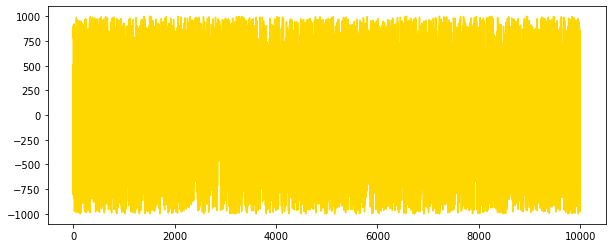

In [3]:
randomlist = []
for i in range(0,9999):
    randomlist.append(random.randint(-1000,1000))

#print(randomlist)
plt.figure(figsize=(10,4))
plt.plot(randomlist,color = 'gold')


## Calculating the mean and standard deviation of the random number list: 

In [52]:
avg = print(np.mean(randomlist))
std_dev = print(np.std(randomlist))

-1.6197619761976199
575.3332982488591


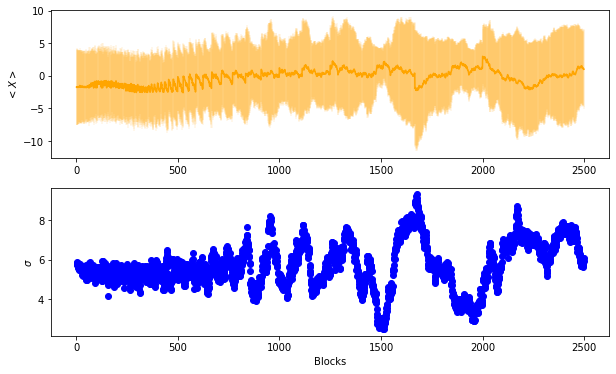

In [63]:

block_average(randomlist)


# Correlated data
What if the data is correlated? Lets see how the block average looks like.
First we create a list with correletad data. we use the same equation provided in the blog.

$x[0] = 0, x[t+1] = 0.95 \times x[t] + 2 \times rand(N,1) -1 $

-1967.221470257847
8307.189059774284


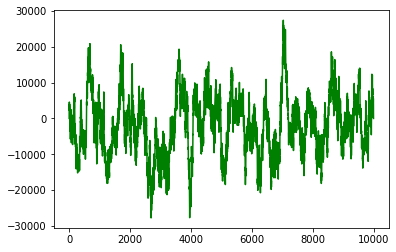

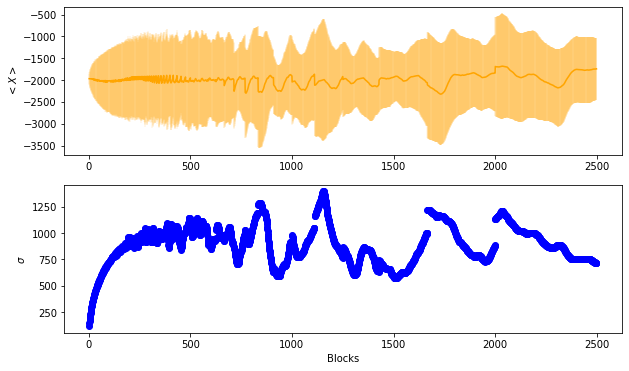

In [10]:
x = np.zeros(10000)


for i in range(1,9999):
    x[i] = 0.99 * x[i-1] + 2*random.randint(-1000,1000) - 1

print(np.mean(x))
print(np.std(x))
plt.plot(x,color = 'green',label='correlated data')
block_average(x)

We can see from the above plot that the data is correletad for the first few blocks  ~100 after which the data is uncorrelated and fairly random. The true standard deviation is close to 1000 as predicted by np.std() function.